In [12]:
from skimage import io,transform
import math
import os
import numpy as np
from matplotlib import pyplot as plot
from common import rgb2gray, six_step_gray, patch2graydot

total dices: %d, %d, %d 92 61 5659


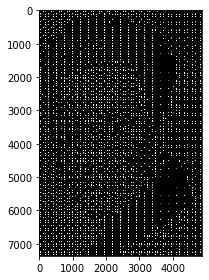

(92.11111111111111, 61.44444444444444)


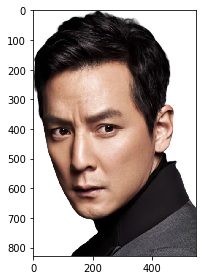

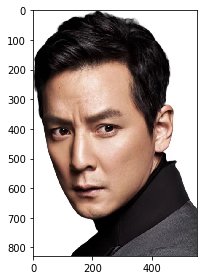

total dices: %d, %d, %d 92 61 5659


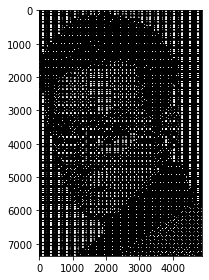

(92.11111111111111, 61.44444444444444)


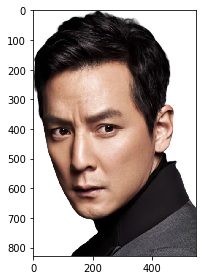

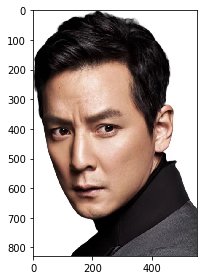

In [13]:
#Image和skimage读图片
dice1 = io.imread('./dice/1.jpg')
dice2 = io.imread('./dice/2.jpg')
dice3 = io.imread('./dice/3.jpg')
dice4 = io.imread('./dice/4.jpg')
dice5 = io.imread('./dice/5.jpg')
dice6 = io.imread('./dice/6.jpg')
dice_numbers = [dice1, dice2, dice3, dice4, dice5, dice6]

#Image和skimage读图片
dice1 = io.imread('./dice/11.jpg')
dice2 = io.imread('./dice/22.jpg')
dice3 = io.imread('./dice/33.jpg')
dice4 = io.imread('./dice/44.jpg')
dice5 = io.imread('./dice/55.jpg')
dice6 = io.imread('./dice/66.jpg')

dice_images = [dice1, dice2, dice3, dice4, dice5, dice6]

def image_from_dice(dice_index,dice_set, reversed=True):
    if reversed:
        return dice_set[dice_index - 1]
    return dice_set[6 - dice_index]


def diceit(source, diceset, output="test.png", x_size=20,y_size=20):
    img2 = source
    width  = img2.shape[0]
    height = img2.shape[1]
    print("total dices: %d, %d, %d", int(width/x_size), int(height/y_size), int(width*height/x_size/y_size))
    mapped_imgs = []
    origin_imgs = []
    for x in range(int(width/x_size)):
        xline_imgs = []
        xline_imgs_orig = []
        for y in range(int(height/y_size)):
            cropped = img2[int(x)*x_size:int(x)*x_size+x_size, int(y)*y_size:int(y)*y_size+y_size]
            dice = patch2graydot(cropped, x_size, y_size)
            xline_imgs.append(image_from_dice(dice, diceset))
            xline_imgs_orig.append(cropped)
    #         print(dice)
        merged = np.concatenate(xline_imgs,axis=1)
        merged_orig = np.concatenate(xline_imgs_orig, axis=1)
    #     io.imshow(merged_orig)
    #     io.show()
        mapped_imgs.append(merged)
        origin_imgs.append(merged_orig)

    io.imshow(np.concatenate(mapped_imgs))
    io.show()
    print((width/x_size, height/y_size))
    io.imsave(output, np.concatenate(mapped_imgs))
    io.imshow(np.concatenate(origin_imgs))
    io.show()
    io.imshow(img2)
    io.show()
#     print(xline_imgs)

origin_file = 'wyz3.jpeg'
img2 = io.imread('./imgs/' + origin_file)
max_dice_numbers = 6000
scale = math.ceil(math.sqrt(img2.shape[0] * img2.shape[1] / 6000))
block_size = scale
diceit(img2, dice_numbers, "output/" + origin_file + ".numbers.png",block_size,block_size)
diceit(img2, dice_images,"output/" + origin_file + ".dice.png",block_size,block_size)
        